# EDA on Breast Cancer Survival data-set

## Table of Contents
A. [Understanding the Problem](#section0001)
1. [Problem Statement](#section1)
2. [Importing Packages](#section2)
3. [Loading Data](#section3)
  - 3.1 [Description of the Datasets](#section301)
  - 3.2 [Pandas Profiling before Data Preprocessing](#section302)
4. [Data Preprocessing](#section4)
  - 4.1 [Removing Duplicate Entries](#section401)
  - 4.2 [Modify the target column/class label to be meaningful as Categorical](#section402)

B. **Questions: Before EDA**
  - How Many Patients died after operation?
  - What is the percentage of Survived/Dead Patients?
  - What are the survival chances based on Years of operations?
  - What are the chances of survival for yonger/older patients?
  - What are the survival/death chances based on axilliary nodes?
  - Is there any change in survival percentage in recent years?
  - Is there any other determinant for Death/Survival?

C. [**Answers of Questions through EDA Analysis**](#answers)

5. [Exploratory Data Analysis](#section5)
	- 5-1. [Univariate Analysis](#section501)
		- 5.1.1 [Frequency of Survival/Died Patients](#section511)
		- 5.1.2 [Percentage of Survival/Died patients.](#section512)
		- 5.1.3 [Distribution plots](#section513)
		- 5.1.4 [PDF and CDF](#section514)
	- 5.2 [Bivariate Analysis](#section502)
		- 5.2.1 [Box plots](#section521)
		- 5.2.2 [Violin Plot](#section522)
		- 5.2.3 [Strip plot — 1-D scatter plot](#section523)
		- 5.2.4 [Bee Swarm plots](#section524)
	- 5.3 [Multivariate Analysis](#section503)
		- 5.3.1 [Pair plots](#section531)
		- 5.3.2 [Correlation Heatmap](#section532)
6. [Conclusion](#section6)
  - 6.1 [Actionable Insights](#section601)<br>
7. [Actionable Insights](#section7)
8. [References](#section8)

<a id=section0001></a>
## A. Understanding the Problem

**Breast cancer** is cancer that develops from breast tissue.[7] Signs of breast cancer may include a lump in the breast, a change in breast shape, dimpling of the skin, fluid coming from the nipple, a newly-inverted nipple, or a red or scaly patch of skin.[1] In those with distant spread of the disease, there may be bone pain, swollen lymph nodes, shortness of breath, or yellow skin.

The **lymphatic system** is one of the body's primary tools for fighting infection. This system contains lymph fluid and lymph nodes, which occur in critical areas in the body. Cancer cells sometimes enter and build up in the lymph system.


**Lymph nodes** are responsible for filtering lymph fluid and detecting chemical changes that signal an infection is present. When these filter points are in the armpit, doctors call them axillary lymph nodes.

As **axillary lymph** nodes are near the breasts, they are often the first location to which breast cancer spreads if it moves beyond the breast tissue.

The number of axillary lymph nodes can vary from person to person, ranging from five nodes to more than 30.


<img src = 'https://www.nationalbreastcancer.org/wp-content/uploads/breast-cancer-facts-what-is-breast-cancer.jpeg'>

*Disclaimer: The images used here are only for illustration purpose.

<a id=section1></a>
## 1. Problem Statement

Based upon the followinig three factors we have to classify whether the patient survived/will survive 5 years and longer or not.

- Age of patient at time of operation (numerical)
- Patient's year of operation (year - 1900, numerical)
- Number of positive axillary nodes detected (numerical)

<a id=section2></a>
## 2. Importing Packages

In [1]:
import numpy as np                     

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.

In [3]:
# Install and update plotly using this command to the latest version (higher than version 4.0.0)

!pip install plotly --upgrade

     |████████████████████████████████| 7.3MB 28kB/s  eta 0:00:01:00:03     |██████████████▏                 | 3.2MB 2.4MB/s eta 0:00:02
  Found existing installation: plotly 4.2.1
    Uninstalling plotly-4.2.1:
      Successfully uninstalled plotly-4.2.1


In [4]:
# Install chart_studio, please use this command. 

!pip install chart-studio

     |████████████████████████████████| 81kB 920kB/s eta 0:00:01


In [5]:
# Making plotly specific imports
# These imports are necessary to use plotly offline without signing in to their website.
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly import tools
init_notebook_mode(connected=True)


<a id=section3></a>
## 3. Loading Data

In this **Data Visualization** sheet we are using the data-set **Breast_Cancer_Survival** provided by INSAID. 

<img src="https://3opi891x2is337tyxl1a3451-wpengine.netdna-ssl.com/wp-content/uploads/BC-Stats-v04_1-in-8-women-Landscape-1024x575.png" width=750 height=750><br/>

- The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago’s Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

In [6]:
# Importing the 1st dataset (Nutrition Facts for McDonald's Menu dataset).

df_BCS = pd.read_csv('Breast_cancer_survival.csv')
df_BCS.head()

,Age,Years_of_operation,Pos_axillary_nodes,Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


<a id=section301></a>
### 3.1 Description of the Dataset

- Age of patient at the time of operation (numerical)
- Patient’s year of operation (year — 1900, numerical)
- Number of positive axillary nodes detected (numerical)

**Survival status (class attribute) :**
- 1 = the patient survived 5 years or longer
- 2 = the patient died within 5 years

| Column Name                    | Description                                                                                |
| -------------------------------|:------------------------------------------------------------------------------------------:| 
| Age                            | Age of patient at the time of operation.                                                   | 
| Years_of_operation             | Patient’s year of operation.                                                               | 
| Pos_axillary_nodes             | Number of positive axillary nodes detected.                                                | 
| Status                         | The patient survived/died within number of years.                                          |

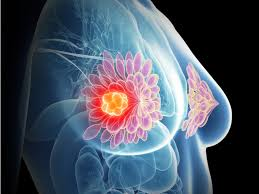<br/>


In [7]:
df_BCS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Age                   306 non-null int64
Years_of_operation    306 non-null int64
Pos_axillary_nodes    306 non-null int64
Status                306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


- There are no missing values in this data set. So there is no need to do data imputation.
- The datatype of ‘survival_status_after_5_years’ column is integer. It has to be converted to categorical datatype.
- The values of ‘survival_status_after_5_years’ column are not meaningful. Hence they are mapped to ‘yes’ (survived after 5 years) and ‘no’ (not survived after 5 years)

In [8]:
df_BCS.describe()

,Age,Years_of_operation,Pos_axillary_nodes,Status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


**Observations:**
- Total number of rows is 306 and columns is 4.
- There are no missing values.
- About 25% of people have no axilary nodes detected.
- Mean age of people is 52
- We can see that there are 225 people survived and 81 people not survived.As 225 is almost triple of 81,we can see that our target set is slightly imbalenced.

<a id=section302></a>
### 3.2 Pandas Profiling before Data Preprocessing

- Here, I will perform **Pandas Profiling before preprocessing** on the dataset, and will name the **output file** as __profiling_before_preprocessing.html__. 


- I will download and open it from the saved directory and take a look at it to see at the insights I can develop from it. 


In [9]:

# To install pandas profiling please run this command.

!pip install pandas-profiling --upgrade


     |████████████████████████████████| 133kB 2.9MB/s eta 0:00:01
     |████████████████████████████████| 614kB 4.9MB/s eta 0:00:01
     |████████████████████████████████| 235kB 6.3MB/s eta 0:00:01


  Using cached https://files.pythonhosted.org/packages/74/3d/1ee25a26411ba0401b43c6376d2316a71addcc72ef8690b101b4ea56d76a/zipp-0.6.0-py2.py3-none-any.whl
  Created wheel for pandas-profiling: filename=pandas_profiling-2.3.0-py2.py3-none-any.whl size=148431 sha256=9dec362d2ddf08603e83714fb0c47d222de05b2178bd8d7a38a467030ed86856
  Stored in directory: /home/nbuser/.cache/pip/wheels/ce/c7/f1/dbfef4848ebb048cb1d4a22d1ed0c62d8ff2523747235e19fe
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27185 sha256=8203013fd194b9648f6f981d881330e2ac97c93b959011cb3f66861fd18a62b5
  Stored in directory: /home/nbuser/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for confuse: filename=confuse-1.0.0-cp36-none-any.whl size=19566 sha256=865020caff9b026c6e2d9b80413806ad387e58923447fad4f88b19bd1787ff3d
  Stored in directory: /home/nbuser/.cache/pip/wheels/b0/b2/96/2074eee7dbf7b7df69d004c9b6ac4e32dad04fb7666cf943bd
Successfully built pan

In [10]:
import pandas_profiling 

In [11]:
# To output pandas profiling report to an external html file.
# Saving the output as profiling_before_preprocessing.html

profile = df_BCS.profile_report(title="BCS Profiling before Data Preprocessing")
profile.to_file(output_file="BCS_profiling_before_preprocessing.html")

**Observations from Pandas Profiling before Data Processing** <br><br>
__Dataset info__:
- Number of variables: 4
- Number of observations: 306
- Missing cells: 0 (0.0%)
- Duplicate rows	17 (5.6%)


__Variables types__: 
- Numeric = 4
- Categorical = 0
- Text (Unique) = 0
- Rejected = 0

Nothing unnaturality found with rest of the values. 

<a id=section4></a>
## 4. Data Preprocessing

<a id=section401></a>
### 4.1 Removing Duplicate entries


In [12]:
# dropping ALL duplicte values 
df_BCS.drop_duplicates(["Age", "Years_of_operation", "Pos_axillary_nodes", "Status"], keep = 'last', inplace = True) 

# displaying data 
df_BCS.info() 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 289 entries, 0 to 305
Data columns (total 4 columns):
Age                   289 non-null int64
Years_of_operation    289 non-null int64
Pos_axillary_nodes    289 non-null int64
Status                289 non-null int64
dtypes: int64(4)
memory usage: 11.3 KB


<a id=section402></a>
### 4.2 Modify the target column/class label to be meaningful as Categorical.

In [13]:
# print the unique values of the class label column
print(list(df_BCS['Status'].unique()))

[1, 2]


In [14]:
#Datapoint per class.
#Surv_status: 1-Survived,2-Died
df_BCS["Status"] = df_BCS["Status"].apply(lambda x: "Survived" if x == 1 else "Died")
df_BCS["Status"].value_counts()
df_BCS.head()

,Age,Years_of_operation,Pos_axillary_nodes,Status
0,30,64,1,Survived
1,30,62,3,Survived
2,30,65,0,Survived
3,31,59,2,Survived
4,31,65,4,Survived


In [15]:
#Check the structure of data again:
df_BCS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289 entries, 0 to 305
Data columns (total 4 columns):
Age                   289 non-null int64
Years_of_operation    289 non-null int64
Pos_axillary_nodes    289 non-null int64
Status                289 non-null object
dtypes: int64(3), object(1)
memory usage: 11.3+ KB


<a id=section5></a>
## 5. Exploratory Data Analysis

<a id=answers></a>
## Answers of Questions through EDA Analysis

<a id=section501></a>
### 5.1 Univariate Analysis

<a id=section511></a>
### 5.1.1 Frequency of Survival/Died patients.

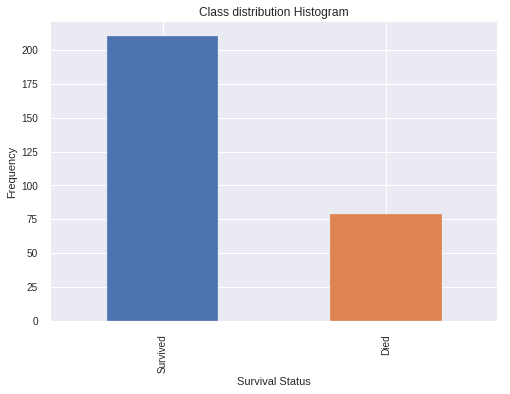

In [16]:
# plot the histogram for the classes
count_classes = pd.value_counts(df_BCS["Status"])
count_classes.plot(kind = 'bar')
plt.title("Class distribution Histogram")
plt.xlabel("Survival Status")
plt.ylabel("Frequency")
plt.show()

<a id=section512></a>
### 5.1.2 Percentage of Survival/Died patients.

Text(0.5, 1.0, 'Pie chart showing the proportion of Survived and Died Patients')

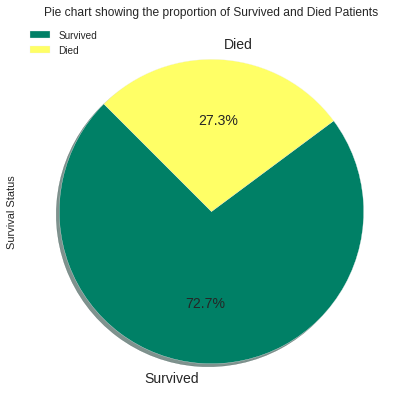

In [17]:
# percentage of classes
# this gives us the distribution of classes in the data set
df_BCS['Status'].value_counts().plot(kind='pie', fontsize=14, autopct='%3.1f%%', 
                                               figsize=(7,7), shadow=True, startangle=135, legend=True, cmap='summer')

plt.ylabel('Survival Status')
plt.title('Pie chart showing the proportion of Survived and Died Patients')

<a id=section513></a>
### 5.1.3 Distribution plots

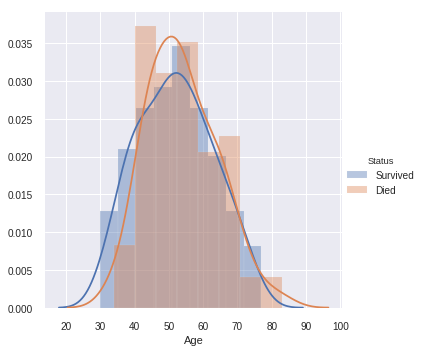

In [18]:
sns.FacetGrid(df_BCS,hue='Status',height = 5)\
 .map(sns.distplot,"Age")\
 . add_legend();
plt.show()

- Major overlapping is observed, which tells us that survival chances are irrespective of a person’s age.
- Although there is overlapping we can vaguely tell that people whose age is in the range 30–40 are more likely to survive, and 40–60 are less likely to survive. While people whose age is in the range 60–75 have equal chances of surviving and not surviving.
- Yet, this cannot be our final conclusion. We cannot decide the survival chances of a patient just by considering the age parameter


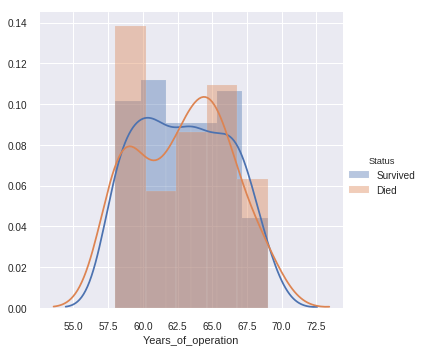

In [19]:
sns.FacetGrid(df_BCS,hue='Status',height = 5)\
 .map(sns.distplot,"Years_of_operation")\
 . add_legend();
plt.show()

- The data is overlapping hence no major information could be gained.
- However, it can be observed that in the years 1960 and 1965 there were more unsuccessful operations.

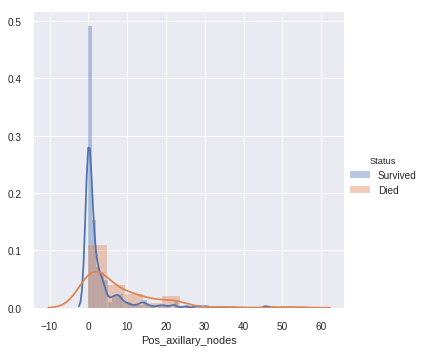

In [20]:
sns.FacetGrid(df_BCS,hue='Status',height = 5)\
 .map(sns.distplot,"Pos_axillary_nodes")\
 .add_legend();
plt.show()

- It is seen that 95% of the patient has axil nodes between 0 to 25.
- Patients with no nodes or 1 node are more likely to survive. There are very few chances of surviving if there are 25 or more nodes.


<a id=section514></a>
### 5.1.4 PDF and CDF:

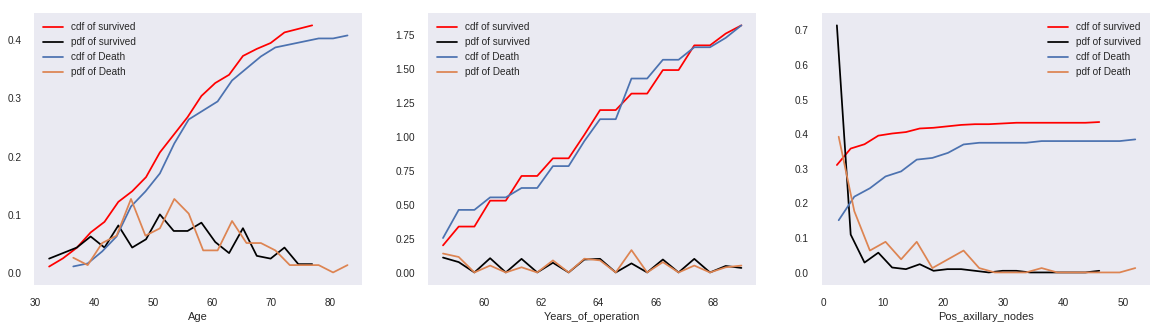

In [21]:
Survived= df_BCS.loc[df_BCS["Status"]== "Survived"]
Died = df_BCS.loc[df_BCS["Status"]=="Died"]


plt.figure(figsize=(20,5))
i=1
for state in (list(df_BCS.columns)[:-1]):
#survived
    plt.subplot(1,3,i)
    Counts , bin_edges = np.histogram(Survived[state],bins=20,density=True)
    pdf=Counts/sum(Counts)
    cdf = np.cumsum(Counts)
    plt.plot(bin_edges[1:],cdf,label="cdf of survived",color="red")
    plt.plot(bin_edges[1:],pdf,label="pdf of survived",color="black")

#Death
    Counts , bin_edges = np.histogram(Died[state],bins=20,density=True)
    pdf=Counts/sum(Counts)
    cdf = np.cumsum(Counts)
    plt.plot(bin_edges[1:],cdf,label="cdf of Death")
    plt.plot(bin_edges[1:],pdf,label="pdf of Death")
    plt.xlabel(state)
    plt.grid()
    plt.legend()
    i+=1
plt.show()

**Observations:**
- Patient with age between age 32-36 has definitly survived the operation and pataient aged 77-85 has definitly not survived the operation.
- No insight of the patient survival status can be drawn form the year of operation as the data for both the case are evenly distrubuted along the year of operations. Excapt the patient who had undergone the surgery between 1961-1965 has slightly higher probablity of survival.
- Also it has been seen that the patient with axil nodes <22 has has better probability of survival and Patient with 0-2 axil node are more likely to survive.

<a id=section502></a>
## 5.2 Bivariate Analysis

<a id=section521></a>
### 5.2.1 Box plots

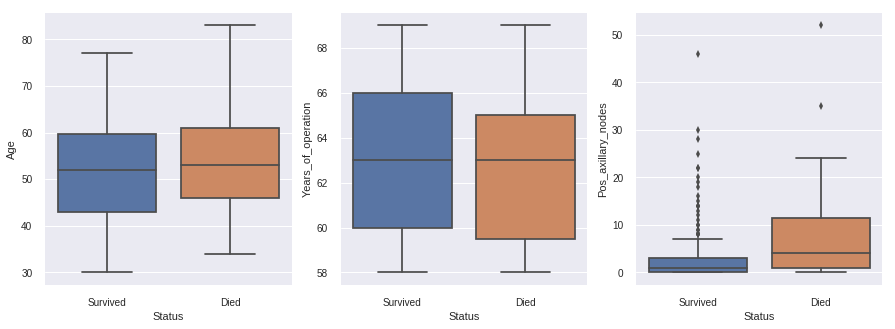

In [22]:
# box plot for all independent variables
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(df_BCS.columns)[:-1]):
    sns.boxplot( x='Status', y = feature, 
                 data=df_BCS, ax=axes[idx])
plt.show()

<a id=section522></a>
### 5.2.2 Violin Plot

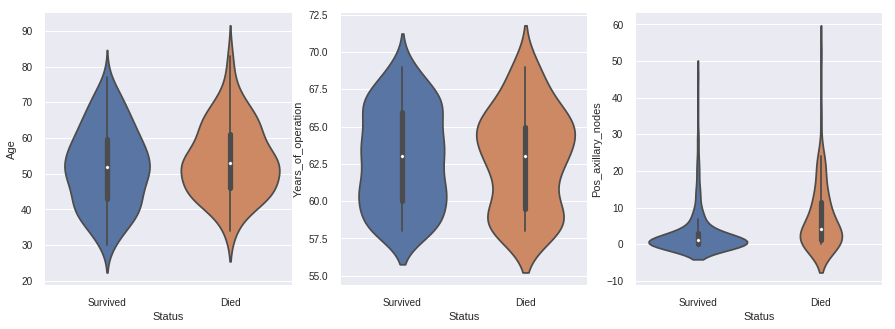

In [23]:
# violin plot for all independent variables
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(df_BCS.columns)[:-1]):
    sns.violinplot( x='Status', y=feature, 
                    data=df_BCS, ax=axes[idx])
plt.show()

**Observation:**

- No major conclusion could be drawn from this plots as the data points are overlapping.
- The number of axil node for survival is dense from 0-5.

<a id=section523></a>
### 5.2.3 Strip plot — 1-D scatter plot

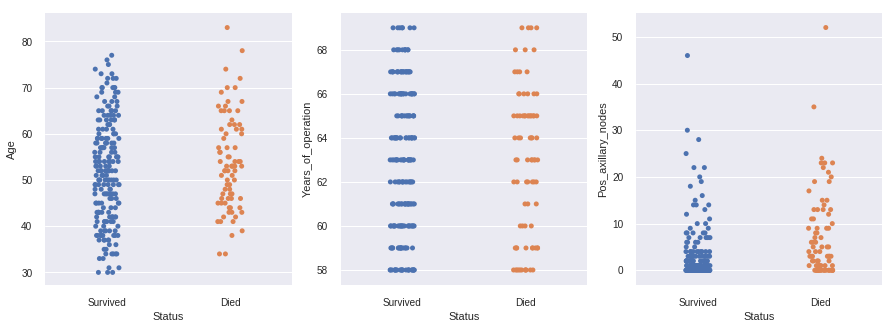

In [24]:
# strip plot for all independent variables
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(df_BCS.columns)[:-1]):
    sns.stripplot( x='Status', y=feature, 
                   data=df_BCS, ax=axes[idx], jitter=True)
plt.show()

<a id=section524></a>
### 5.2.4 Bee Swarm plots

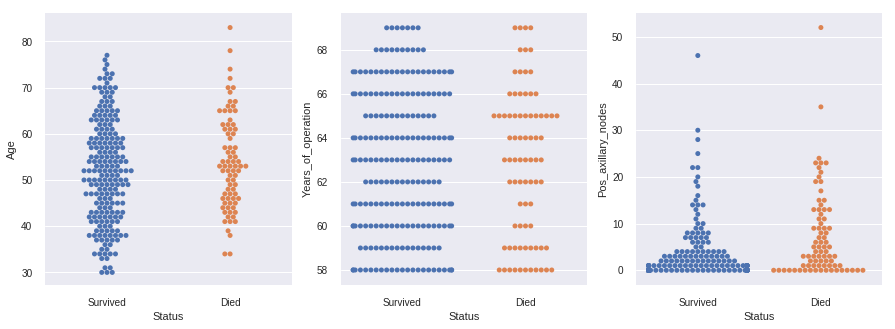

In [25]:
# swarm plot for all independent variables
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(df_BCS.columns)[:-1]):
    sns.swarmplot( x='Status', y=feature, 
                   data=df_BCS, ax=axes[idx])
plt.show()

From the above plot, we can observe that, as the patient year of operation is the latest, survival is little better.

<a id=section503></a>
## 5.3 Multi-variate Analysis

<a id=section531></a>
### 5.3.1 Pair plots

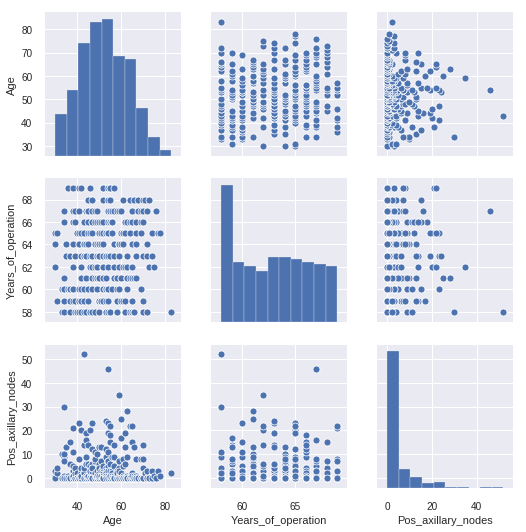

In [26]:
# after we have made the categorical variable 'Survival_Status' as of type 'category', 
# the default sns pairplot won't show that feature now.
sns.pairplot(df_BCS)

No specific information can be obtained from pairplot.

In [27]:
#Let’s convert the categorical column to numerical using Label Encoder.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df_BCS['Status'])
df_BCS['Status'] = le.transform(df_BCS['Status'])
# check the structure of data
df_BCS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289 entries, 0 to 305
Data columns (total 4 columns):
Age                   289 non-null int64
Years_of_operation    289 non-null int64
Pos_axillary_nodes    289 non-null int64
Status                289 non-null int64
dtypes: int64(4)
memory usage: 21.3 KB


<a id=section532></a>
### 5.3.2 Correlation Heatmap:

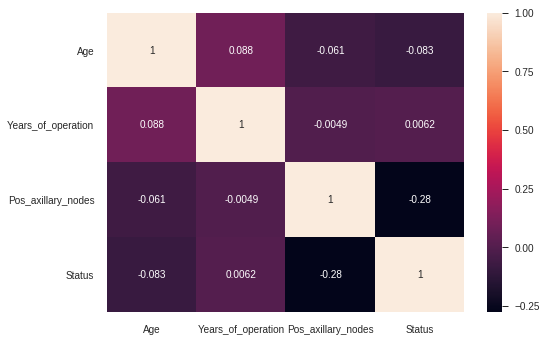

In [28]:
sns.heatmap(df_BCS.corr(), annot = True)

<a id=section6></a>
## 6. Conclusion

- Patients having less than 5 positive axillary nodes have slightly high rate of     survival.
- Patient’s age and operation year alone are not deciding factors for his/her survival. Yet, people less than 35 years have more chance of survival.
- Survival chance is inversely proportional to the number of positive axillary nodes. We also saw that the absence of positive axillary nodes cannot always guarantee survival.


<a id=section7></a>
## 7. Actionable Insights
- From the analysis, I could not put together any actionable items to better the survival percentage. Since, there was a positive trend in survival percentage in recent years, I reckon that is due to advancement of medical science in this field. Hope this becomes better in days to come.

- The other option would be to an initiative from the Govt. to increase the awareness of this disease. Since, survival chances are better if positive axillary nodes are less than 5, may be consulting doctors a the initial stages would increase the survival percentage.


<a id=section8></a>
## 8. References

- Wikipedia
- Kaggle
- Google